In [14]:
#Import at least three documents you would like to compare.
import urllib.request, urllib.error, urllib.parse

url = 'https://www.gutenberg.org/cache/epub/4018/pg4018.txt'

response = urllib.request.urlopen(url)
webContent = response.read()

f = open('Ozaki.txt', 'wb')
f.write(webContent)
f.close()

print(webContent[0:1000])

b'\xef\xbb\xbfThe Project Gutenberg EBook of Japanese Fairy Tales, by Yei Theodora Ozaki\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: Japanese Fairy Tales\r\n\r\nAuthor: Yei Theodora Ozaki\r\n\r\nPosting Date: June 4, 2009 [EBook #4018]\r\nRelease Date: May, 2003\r\nFirst Posted: October 11, 2001\r\n\r\nLanguage: English\r\n\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK JAPANESE FAIRY TALES ***\r\n\r\n\r\n\r\n\r\nProduced by Charles Franks, Greg Weeks and the Online\r\nDistributed Proofreading Team. HTML version by Al Haines.\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nJAPANESE FAIRY TALES\r\n\r\nCOMPILED BY\r\n\r\nYEI THEODORA OZAKI\r\n\r\n\r\n\r\n\r\nProfusely Illustrated by Japanese Artists\r\n\r\n\r\n\r\n\r\nTO\r\n\r\nELEANOR MARION-CRAWFORD.

In [15]:
import urllib.request, urllib.error, urllib.parse

url = 'https://www.gutenberg.org/cache/epub/28/pg28.txt'

response = urllib.request.urlopen(url)
webContent = response.read()

f = open('Aesop.txt', 'wb')
f.write(webContent)
f.close()

print(webContent[0:1000])

b"\xef\xbb\xbfThe Project Gutenberg EBook of Aesop's Fables, by Aesop\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: Aesop's Fables\r\n\r\nAuthor: Aesop\r\n\r\nPosting Date: December 18, 2011 [EBook #28]\r\nRelease Date: March 8, 1992\r\nLast Updated: March 15, 2002\r\n\r\nLanguage: English\r\n\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK AESOP'S FABLES ***\r\n\r\n\r\n**********************************************************************\r\nEBOOK (#30) WAS ONE OF PROJECT GUTENBERG'S EARLY FILES PRODUCED AT A\r\nTIME WHEN PROOFING METHODS AND TOOLS WERE NOT WELL DEVELOPED. THERE IS\r\nAN IMPROVED EDITION OF THIS TITLE WHICH MAY BE VIEWED AT EBOOK #18732\r\n**********************************************************************\r\n\r\n\r\n\r\n\r\n\r\n  

In [16]:
import urllib.request, urllib.error, urllib.parse

url = 'https://www.gutenberg.org/cache/epub/537/pg537.txt'

response = urllib.request.urlopen(url)
webContent = response.read()

f = open('Doyle.txt', 'wb')
f.write(webContent)
f.close()
print(webContent[0:1000])

b"\xef\xbb\xbfProject Gutenberg's Tales of Terror and Mystery, by Arthur Conan Doyle\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: Tales of Terror and Mystery\r\n\r\nAuthor: Arthur Conan Doyle\r\n\r\nPosting Date: October 10, 2008 [EBook #537]\r\nRelease Date: May, 1996\r\n[Last updated: December 8, 2011]\r\n\r\nLanguage: English\r\n\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK TALES OF TERROR AND MYSTERY ***\r\n\r\n\r\n\r\n\r\nProduced by Charles Keller.  HTML version by Al Haines.\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nTales of Terror and Mystery\r\n\r\n\r\nBy\r\n\r\nSir Arthur Conan Doyle\r\n\r\n\r\n\r\nContents\r\n\r\nTales of Terror\r\n\r\n  The Horror of the Heights\r\n  The Leather Funnel\r\n  The New Catacomb\r\n  The Case of Lady Sannox\r\n

In [17]:
#Preprocess the text and create a tokenized corpus from the text of the imported documents.
import nltk
import nltk.tokenize

# download the most recent punkt package
nltk.download('punkt', quiet=True)

corpus = ["Ozaki.txt","Aesop.txt","Doyle.txt"]
titles = ["Japanese Fairy Tales","Aesop's Fables","Tales of Terror and Mystery"]
documents = []
for url in corpus:
    f = open(url, encoding='utf-8')
    text = f.read()
    documents.append(text)
print(documents[1][0:100])

The Project Gutenberg EBook of Aesop's Fables, by Aesop

This eBook is for the use of anyone anywhe


In [18]:
#Preprocessing: checking to see if a string is not a punctuation marker
import re

PUNCT_RE = re.compile(r'[^\w\s]+$')

def is_punct(string):
    
    return PUNCT_RE.match(string) is not None


In [19]:
##Preprocessing: putting text into lower case tokens
def preprocess_text(text, language, lowercase=True):
   
    if lowercase:
        text = text.lower()
    tokens = nltk.tokenize.word_tokenize(text, language=language)
    tokens = [token for token in tokens if not is_punct(token)]
    return tokens

In [22]:
#Preprocessing: this demonstrates that the strings have been tokenized and put in lower case 
tokenized = []
for text in documents:
    tokenized.append(preprocess_text(text, "english"))

print(tokenized[0][11])

ozaki


In [23]:
#Preprocessing: here we are creating a list of unique words that will be placed in alpha order and make sure the text is ready to be turned into a term-matrix
def extract_vocabulary(tokenized_corpus, min_count=1, max_count=float('inf')):
   
    vocabulary = collections.Counter()
    for document in tokenized_corpus:
        vocabulary.update(document)
    vocabulary = {word for word, count in vocabulary.items()
                  if count >= min_count and count <= max_count}
    return sorted(vocabulary)
import collections
vocabulary = extract_vocabulary(tokenized, min_count=2)
print(vocabulary[0:100])

["'and", "'as-is", "'crack", "'devil", "'he", "'is", "'it", "'ll", "'m", "'s", "'the", "'ve", "'yes", "'you", '//gutenberg.org/license', '//pglaf.org', '//pglaf.org/donate', '//pglaf.org/fundraising', '//www.gutenberg.org', '//www.pglaf.org', '1', '1.', '1.a', '1.b', '1.c', '1.d', '1.e', '1.e.1', '1.e.2', '1.e.3', '1.e.4', '1.e.5', '1.e.6', '1.e.7', '1.e.8', '1.e.9', '1.f', '1.f.1', '1.f.2', '1.f.3', '1.f.4', '1.f.5', '1.f.6', '15', '1500', '1890', '18th', '1908.', '2', '2.', '20', '2001', '2011', '21st', '3', '3.', '30', '3rd', '4', '4.', '4557', '4th', '5,000', '5.', '50', '501', '596-1887', '60', '64-6221541.', '713', '77b', '7th', '8', '801', '809', '84116', '90', '99712.', 'a', 'abandon', 'abandoned', 'abide', 'ability', 'ablaze', 'able', 'abnormal', 'abode', 'abominable', 'about', 'above', 'abroad', 'absence', 'absent', 'absolute', 'absolutely', 'absurd', 'absurdly', 'abundance', 'accept', 'accepted']


In [27]:
#Create a document term matrix to enable comparative textual analysis across the full set of documents
#Chart at least one comparison between the documents, using word frequency to map the text
def corpus2dtm(tokenized_corpus, vocabulary):
    
    document_term_matrix = []
    for document in tokenized_corpus:
        document_counts = collections.Counter(document)
        row = [document_counts[word] for word in vocabulary]
        document_term_matrix.append(row)
    return document_term_matrix

import numpy as np

document_term_matrix = np.array(corpus2dtm(tokenized, vocabulary))
old_id = vocabulary.index('old')
young_id = vocabulary.index('young')

old_counts = document_term_matrix[:, old_id]
young_counts = document_term_matrix[:, young_id]
print("Old: " + str(old_counts))
print("Young: " + str(young_counts))

Old: [401  24  68]
Young: [52 17 46]


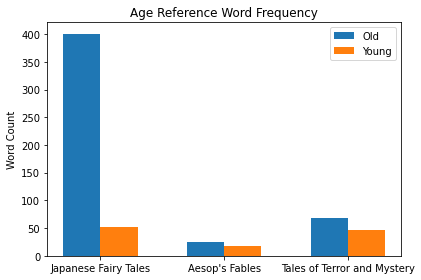

In [32]:
import matplotlib.pyplot as plt

x = np.arange(len(titles))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, old_counts, width, label='Old')
rects2 = ax.bar(x + width/2, young_counts, width, label='Young')

ax.set_ylabel('Word Count')
ax.set_title('Age Reference Word Frequency')
ax.set_xticks(x)
ax.set_xticklabels(titles)
ax.legend()

fig.tight_layout()

plt.show()

In [29]:
japanese = np.array([old_counts[0], young_counts[0]])
aesop = np.array([old_counts[1], young_counts[1]])
tales = np.array([old_counts[2], young_counts[2]])

In [31]:
#Calculate the Euclidean distance between the documents, using two key words as the point of comparison
def euclidean_distance(a, b):

    return np.sqrt(np.sum((a - b) ** 2))

japaneseaesop = euclidean_distance(japanese, aesop)
print(f'Japanese - Aesop: {japaneseaesop:.2f}')

japanesetales = euclidean_distance(japanese, tales)
print(f'Japanese - Tales: {japanesetales:.2f}')

aesoptales = euclidean_distance(aesop, tales)
print(f'Aesop - Tales: {aesoptales:.2f}')

Japanese - Aesop: 378.62
Japanese - Tales: 333.05
Aesop - Tales: 52.70
